##선택분류

In [ ]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import os 
from PIL import Image

In [ ]:
#경로 아래에 있는 파일이나 폴더 이름 가져오기
def list_dir(path):
  file_names = os.listdir(path) #os path 아래있는 파일의 이름을 저장 
  file_names.sort() #이름 순으로 정렬 
  return file_names



In [ ]:
#imagepath 와 resolution 
def load_image_pixels(imagepath,resolution):
  img = Image.open(imagepath)
  img_resize = img.resize(resolution)
  return np.array(img_resize)

  

In [ ]:
#onehot vector 
def onehot(idxs,cnt):
  return np.eye(cnt)[idxs]

In [ ]:
#flowers_init

def flowers_init(resolution):
  global pixels,idx,target_names
  path = '/content/drive/MyDrive/인공지능사관학교/딥러닝/data/flowers/'
  resolution = [100,100]
  images = []
  idxs = []
  #꽃 이미지의 상위 폴더 이름 가져오기
  target_names = list_dir(path)

  for idx ,target in enumerate(target_names):
    subpath = path + target
    filenames = list_dir(subpath)

    for fname in filenames:
      if fname[-4:] != '.jpg':
        continue
      imagepath = os.path.join(subpath,fname)
      pixels = load_image_pixels(imagepath,resolution)

      images.append(pixels)
      idxs.append(idx)

    xs = np.asarray(images,dtype = np.float32)
    ys = onehot(idxs,len(target_names))

    return xs,ys

In [ ]:
#xs = 꽃들의 이미지 정보 ys = 원핫 벡터로 정의된 레이블 정보 
resolution = [100,100]
xs,ys = flowers_init(resolution)

In [ ]:
#image 정규화 편향을 막기 위해 
xs_norm = xs/255.0

In [ ]:
#shuffle map 만들기 
shuffle_map = np.arange(xs_norm.shape[0])
np.random.shuffle(shuffle_map)

In [ ]:
#test_begin_index 
train_ratio = 0.8
test_begin_index = int(xs_norm.shape[0] * train_ratio)

In [ ]:
#train_test_split
train_x = xs_norm[shuffle_map[:test_begin_index]]
train_y = ys[shuffle_map[:test_begin_index]]

test_x = xs_norm[shuffle_map[test_begin_index:]]
test_y = ys[shuffle_map[test_begin_index:]]

##model


In [ ]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3), #한장이 들어가는 크기 100 100 3(RGB값)
    filters=16, strides = (1,1),padding = 'valid'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=5, activation = 'softmax') #분류 하고자 하는 데이터 가 5개 니까 UNIT  = 5
])

#print(model_0.summary())

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),filters=32),
    tf.keras.layers.MaxPool2D(strides = (2,2),pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 64),
    tf.keras.layers.AvgPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
])
#print(model_1.summary())


model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(100,100,32),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 128, padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),loss = 'categorical_crossentropy',metrics = [tf.keras.metrics.TruePositives(name = 'TP'),tf.keras.metrics.FalsePositives(name = 'FP')])

In [ ]:
history = model_1.fit(train_x,train_y,epochs = 50,batch_size = 32,validation_split = 0.2)

Epoch 1/50
15/15 [==============================] - 10s 563ms/step - loss: 0.5558 - TP: 311.0000 - FP: 0.0000e+00 - val_loss: 0.0941 - val_TP: 118.0000 - val_FP: 0.0000e+00
Epoch 2/50
15/15 [==============================] - 8s 531ms/step - loss: 0.0527 - TP: 472.0000 - FP: 0.0000e+00 - val_loss: 0.0228 - val_TP: 118.0000 - val_FP: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 8s 529ms/step - loss: 0.0170 - TP: 473.0000 - FP: 0.0000e+00 - val_loss: 0.0135 - val_TP: 118.0000 - val_FP: 0.0000e+00
Epoch 4/50
15/15 [==============================] - 8s 527ms/step - loss: 0.0105 - TP: 473.0000 - FP: 0.0000e+00 - val_loss: 0.0106 - val_TP: 118.0000 - val_FP: 0.0000e+00
Epoch 5/50
15/15 [==============================] - 8s 527ms/step - loss: 0.0089 - TP: 473.0000 - FP: 0.0000e+00 - val_loss: 0.0092 - val_TP: 119.0000 - val_FP: 0.0000e+00
Epoch 6/50
15/15 [==============================] - 8s 529ms/step - loss: 0.0065 - TP: 473.0000 - FP: 0.0000e+00 - val_loss: 0.0083 - val_T

In [ ]:
pred_y = model_1.predict(test_x)

In [ ]:
path = '/content/drive/MyDrive/인공지능사관학교/딥러닝/data/flowers/'
target_names =list_dir(path)
print(target_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


(1, 100, 100, 3)


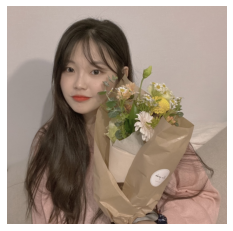

In [ ]:
path = '/content/예측 1.jpg'
pixels = load_image_pixels(path,[100,100])

#pixels_norm = pixels/255.0
pixels_norm = pixels_norm.reshape(1,100,100,3)
print(pixels_norm.shape)
pred_y = model_1.predict(pixels_norm)
plt.imshow(img_image)
plt.axis('off')
plt.show()

In [ ]:
pred_y_index = np.argmax(pred_y)
print(np.round(pred_y,3))
print(target_names[pred_y_index])

[[1. 0. 0. 0. 0.]]
daisy
